<a href="https://colab.research.google.com/github/AshleyHeinrich/Sales-Predictions/blob/main/Project_1_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 1 - Part 1
 Ashley Heinrich

## Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive' )
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

filename = ('https://docs.google.com/spreadsheets/d/e/2PACX-1vQi7iKxT7clZBqORghprLraGVOXXfp2A0Y2Z1gHE2BWOoOYeKvsOWNjHyZYE-fJ_45COs2lYKQVZSxJ/pub?output=csv')
sales_df = pd.read_csv(filename)
sales_df

Mounted at /content/drive


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## Data Cleaning


In [ ]:
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
sales_df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [ ]:
sales_df.dtypes
#2. We have objects, floats and integers for our datatypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
sales_df.info()
## 1. There are 12 columns and 8523 rows ****
## 2. The datatypes are objects, integers and floats
### Data types appropriate for the information in each column. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#Gives rows and columns again
sales_df.shape


(8523, 12)

In [ ]:
# Examine the number of unique values in columns
# Item_Identifier, Item_Visibility, Item_MRP, and Item_Outlet_Sales have many unique values
# Fat_Content, Item_Type, _Outlet_Identifier, Establishment Year, Size and Type have few/more significant?
sales_df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
# 3. Check for duplicates 
# No duplicates present 

sales_df.duplicated().sum()

0

In [ ]:
# Examining object type columns with .value_counts() 
# Checking data types for object columns
# Looking for inconsistent categories of data

sales_df['Item_Identifier'].value_counts()
# Appears appropriate

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [ ]:
## Low Fat=LF=low fat .... Regular = reg, 
#  Need to rename values and standardize to ensure consistency
sales_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Renaming for Consistency in Categorical Values
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].replace('LF', 'Low Fat')
sales_df['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Renaming for Consistency in Categorical Values
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].replace('low fat', 'Low Fat')
sales_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Renaming for Consistency in Categorical Values
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].replace('reg', 'Regular')
sales_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Appropriate 
sales_df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
# Appropriate
sales_df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [ ]:
#Appropriate
sales_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
#Change High to Large ... Just looks better
sales_df['Outlet_Size'] = sales_df['Outlet_Size'].replace('High', 'Large')
sales_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

In [ ]:
# Appropriate
sales_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
# Appropriate 
sales_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
# Identify Missing 
## Missing 1463 in Item_Weight
## Missing 2410 in Outlet_Size
sales_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
sales_df[sales_df.isna().any(axis = 1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
...,...,...,...,...,...,...,...,...,...,...,...,...
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [ ]:
# Decide what to do with missing values
# From info() there are 415 different weights. Taking mean weight
mean_weight = sales_df['Item_Weight'].mean()
mean_weight


12.857645184135976

In [ ]:
# Fill in missing data with mean
sales_df['Item_Weight'].fillna(mean_weight, inplace=True)


In [ ]:
# Check for missing values 
# Item_Weight corrected
sales_df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# Missing Values: Outlet_Size 
# Insert 'missing' and add column for missing values to not skew it

sales_df['Outlet_Size'].fillna('Missing', inplace=True)


In [ ]:
# Checking for missing values
# No missing values
sales_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
#8. #8. For any numerical columns, obtain the summary statistics of each (min, max, mean)

sales_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Visuals

In [ ]:
# Brought in types
sales_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

**Outlet Sales Distribution Visualizatio**n 

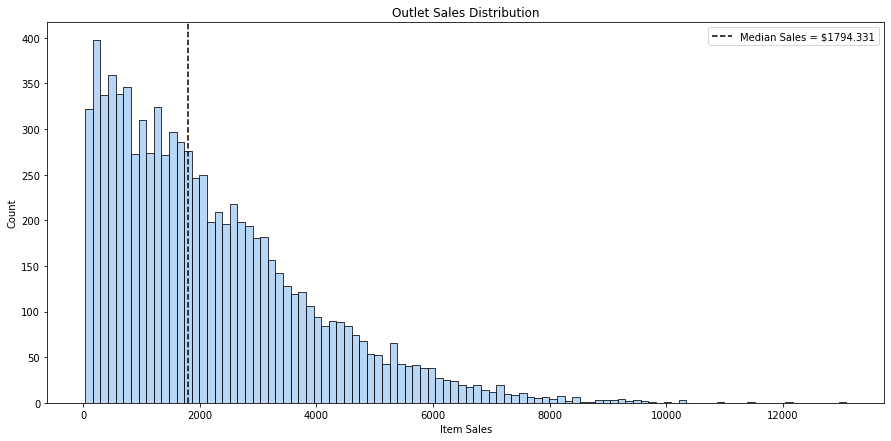

In [ ]:
sns.set_palette('pastel')

plt.figure(figsize = (15,7))
ax = sns.histplot(data = sales_df, x = 'Item_Outlet_Sales', bins=100);


ax.set(title = 'Outlet Sales Distribution', xlabel = 'Item Sales')

median = sales_df['Item_Outlet_Sales'].median()

ax.axvline(median, color = 'black', ls = '--',
           label = f'Median Sales = ${median}')

ax.legend();

# From Learn and class notes

* Outlet Sales distribution is right skewed 
*  Most sales occur around median and below

In [ ]:
sales_df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

**Item Visibility Distribution Visualization**

In [ ]:
# Item Visibility Column Information

sales_df['Item_Visibility'].value_counts()


0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

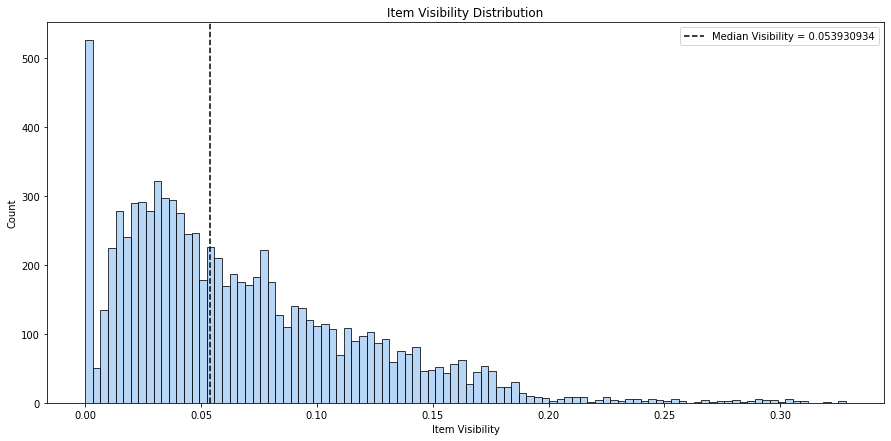

In [ ]:
#Histogram of Item Visibility to analyze distribution

plt.figure(figsize = (15,7))
ax = sns.histplot(data = sales_df, x ='Item_Visibility', bins = 100);

ax.set(title = 'Item Visibility Distribution', xlabel = 'Item Visibility')

median = sales_df['Item_Visibility'].median()

ax.axvline(median, color = 'black', ls = '--',
           label = f'Median Visibility = {median}')

ax.legend();
# From Learn and class notes

* Item_Visibility distribution is also right skewed
* Most have zero visibility

In [ ]:
sales_df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

**Item Weight Distribution**

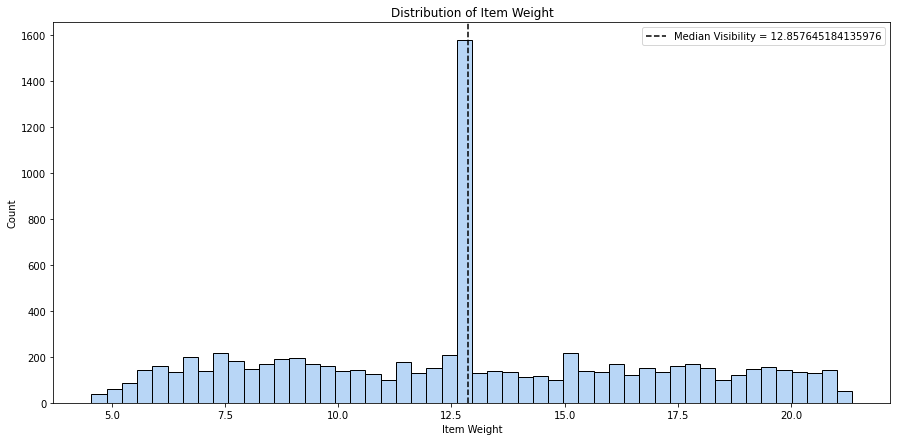

In [ ]:

plt.figure(figsize = (15,7))
ax = sns.histplot(data = sales_df, x ='Item_Weight', bins = 50);

ax.set(title = 'Distribution of Item Weight', xlabel = 'Item Weight')

median = sales_df['Item_Weight'].median()

ax.axvline(median, color = 'black', ls = '--',
           label = f'Median Visibility = {median}')

ax.legend();
#From Learn and class notes

* Largest amount of items fall around the median weight due to filling in missing values

**Item Sales Boxplot Visualization**

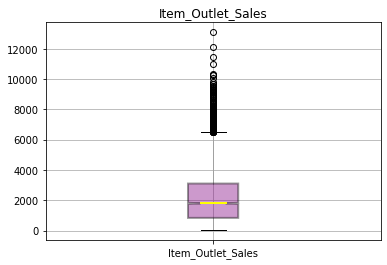

In [ ]:
sales_df.boxplot(column = ['Item_Outlet_Sales'], 
           notch = True, patch_artist = True, 
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'purple', alpha = .4));
           
plt.title('Item_Outlet_Sales');

# From Learn

* There are many sales outliers present above maximum 

**Item Visibility Boxplot Visualization**



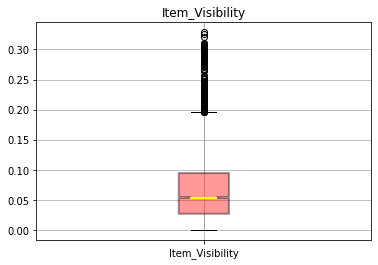

In [ ]:
sales_df.boxplot(column = ['Item_Visibility'], 
           notch = True, patch_artist = True, 
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'red', alpha = .4));
           
plt.title('Item_Visibility');

#From Learn

* Many visibility outliers present above maxiumum

**Item Weight Boxplot Distribution**

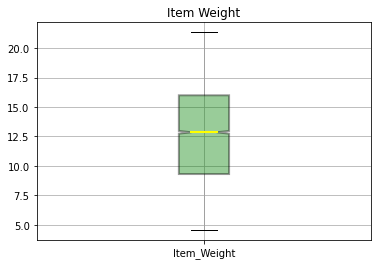

In [ ]:
sales_df.boxplot(column = ['Item_Weight'], 
           notch = True, patch_artist = True, 
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'green', alpha = .4));
           
plt.title('Item Weight');

# From Learn

* No outliers present for item weight

**Alternate Boxplot Visualization for Item_Weight**

In [ ]:
sales_df['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

**Correlation of Data using Heatmap**

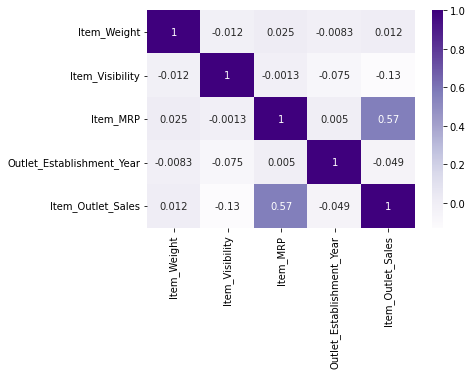

In [ ]:
corr = sales_df.corr()
sns.heatmap(corr, cmap = 'Purples', annot= True);

# From Learn Platform 

* There is a moderate correlation between Item_MRP and Item_Outlet Sales
* This is to be expected as item price correlates to total sales
* There are no other significant correlations present in the dataset

Fat Content Visualization

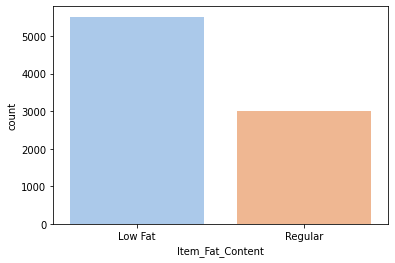

In [ ]:
sns.countplot(data=sales_df, x='Item_Fat_Content');

*More low fat items than regular in data set

**Fat Content and Outlet Sales Visualization**

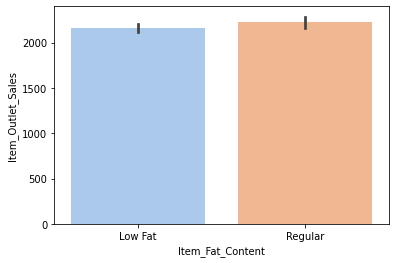

In [ ]:
sns.barplot(data=sales_df, x='Item_Fat_Content', y='Item_Outlet_Sales');

 * More regular items are sold but the sales are close





**Compare Item_Type to Outlet_Sales**

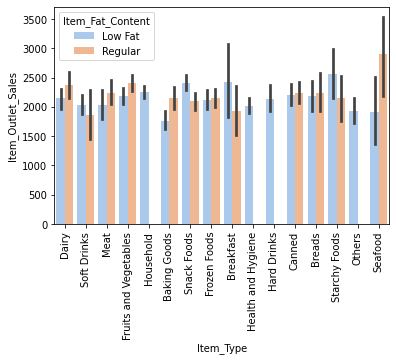

In [ ]:
sns.barplot(data=sales_df, x='Item_Type', y='Item_Outlet_Sales', hue ='Item_Fat_Content');
plt.xticks(rotation='vertical');

* Shows how each item is selling
* Regular seafood selling more than low fat seafood
* Low fat starchy foods are selling more than regular fat
* Low fat breakfast foods are selling more than regular fat
* Low fat snack foods are selling more than regular fat
* Regular fat baking goods are selling more than low fat
* Regular fat dairy is selling more than low fat dairy

**Comparing Item_Type to Item_MRP**

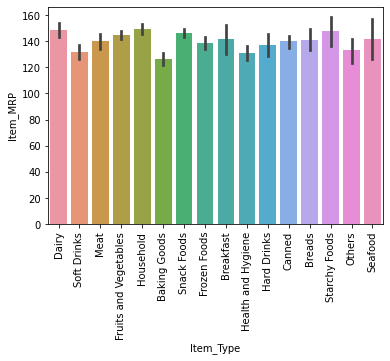

In [ ]:
sns.barplot(data=sales_df, x='Item_Type', y='Item_MRP');
plt.xticks(rotation='vertical');

* Item type and its sales price
* Highest priced items are dairy, household goods, starchy foods
* Lowest priced are baking goods

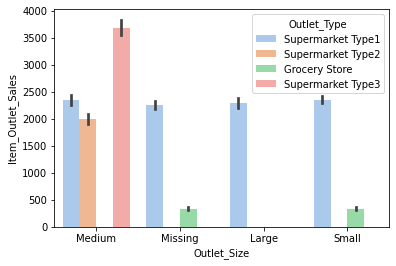

In [ ]:
sns.barplot(data=sales_df, x='Outlet_Size', y='Item_Outlet_Sales', hue='Outlet_Type');


* Pending data marked as missing, medium sized stores have the highest sales
* Supermarket type 3 has the highest sales in the medium category
* Large size only has Supermarket type 1's
* Supermarket type 1 has the highest sales in the small size category

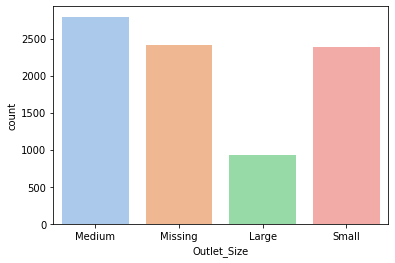

In [ ]:
sns.countplot(data=sales_df, x='Outlet_Size');

* Pending data marked missing, medium outlet stores are the most popular size
followed by small 

## Explanatory Visuals